# Preprocessing Data Set

In [1]:
import pandas as pd
data = pd.read_csv('/content/pdc_dataset_with_target.csv')
data.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,target
0,27.75,55.0,B,875.98,No,8,44.16,0
1,31.33,39.0,C,839.91,No,4,13.93,1
2,23.87,10.0,A,1364.70,Yes,4,15.16,0
3,35.64,34.0,C,1462.07,No,4,15.71,1
4,NaN,NaN,C,710.61,No,8,13.77,1


In [2]:
data['feature_1'].mean()

np.float64(29.990843475581585)

### Filling out missing values with mean values in which feature values are missing
* **feature_1**,**feature_2**, **feature_4**, **feature_7** have missing values
* We filled those values with mean of values  

In [3]:
missing_features = ['feature_1', 'feature_2', 'feature_4', 'feature_7']
for i in missing_features:
    data[f'{i}'] = data[f'{i}'].fillna(data[f'{i}'].mean())
print("Testing out are missing values are filled?: ")
for i in missing_features:
    print(data[f'{i}'].count())


Testing out are missing values are filled?: 
41000
41000
41000
41000


In [4]:
data.target.value_counts()

,count
target,
0,24682
1,16318


In [5]:
data.feature_3.value_counts()

,count
feature_3,
A,13704
C,13680
B,13616


### One hot encoding of feature 3 and feature 5

In [6]:
#one hot encoding of feature 3
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
encoded_1 = pd.get_dummies(data['feature_3'])
encoded_2 = pd.get_dummies(data['feature_5'])

In [7]:
print(encoded_2)

          No    Yes
0       True  False
1       True  False
2      False   True
3       True  False
4       True  False
...      ...    ...
40995  False   True
40996   True  False
40997  False   True
40998  False   True
40999  False   True

[41000 rows x 2 columns]


## Checking class balance of dataset

target
0    24682
1    16318
Name: count, dtype: int64


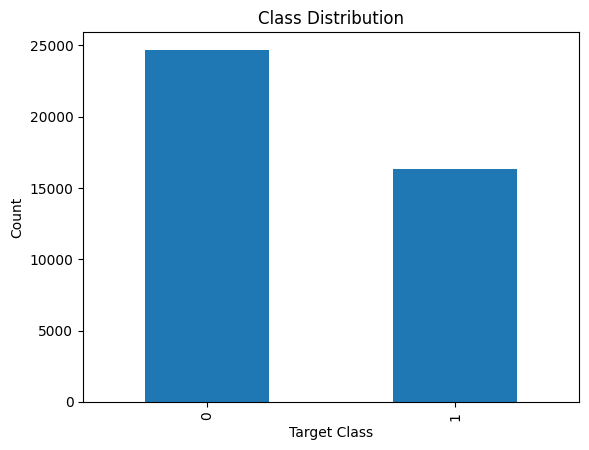

In [8]:
import matplotlib.pyplot as plt


print(data['target'].value_counts())


data['target'].value_counts().plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Target Class')
plt.ylabel('Count')
plt.show()


In [9]:
data.head(10)

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,target
0,27.750000,55.00000,B,875.98,No,8,44.160000,0
1,31.330000,39.00000,C,839.91,No,4,13.930000,1
2,23.870000,10.00000,A,1364.70,Yes,4,15.160000,0
3,35.640000,34.00000,C,1462.07,No,4,15.710000,1
4,29.990843,49.43656,C,710.61,No,8,13.770000,1
5,28.000000,99.00000,B,855.72,Yes,3,23.145819,0
6,28.460000,29.00000,C,853.70,No,5,22.650000,0
7,29.210000,59.00000,C,1122.96,No,6,4.750000,0
8,34.030000,18.00000,C,1289.26,Yes,2,24.100000,0
9,42.650000,47.00000,A,1600.50,No,7,2.070000,1


###  Importing all neccessary libraries for data standardization, splitting and model training


In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.utils import class_weight
import numpy as np
import time

### Standardazing and splittng data for training Testing Purposes


In [11]:

#loading data
df = pd.DataFrame(data)

#encoding categorical variable
#Label Encode 'feature_5' (Yes/No)
le = LabelEncoder()
df['feature_5'] = le.fit_transform(df['feature_5'])

#one hot encoding 'feature_3' (A, B, C)
df = pd.get_dummies(df, columns=['feature_3'], drop_first=True)

#separating features and target
X = df.drop('target', axis=1)
y = df['target']

#standardizing features for model training
scaler = StandardScaler()
X_scaled = X

#train/Test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

#Handle Class Imbalance (if any)
weights = class_weight.compute_class_weight('balanced', classes=np.array([0, 1]), y=y_train)
class_weights = {0: weights[0], 1: weights[1]}


## Using Logistic Regression

In [12]:
start_time = time.time()

#Training Logistic Regression model
model = LogisticRegression(C=0.7, class_weight=class_weights, max_iter=1000)
model.fit(X_train, y_train)
end_time = time.time()
lr_time = end_time - start_time

y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Execution time of model is {lr_time}sec")
print("Accuracy:", acc)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Execution time of model is 0.9211857318878174sec
Accuracy: 0.5042276422764228

Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.51      0.55      7405
           1       0.40      0.50      0.45      4895

    accuracy                           0.50     12300
   macro avg       0.50      0.50      0.50     12300
weighted avg       0.52      0.50      0.51     12300


Confusion Matrix:
 [[3754 3651]
 [2447 2448]]


In [ ]:
data.shape

(41000, 8)

## Using Desicion Tree

In [13]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.utils import class_weight



start_time = time.time()
# training using random forest model
model = RandomForestClassifier(class_weight='balanced', n_estimators=100, random_state=42)
model.fit(X_train, y_train)
end_time = time.time()
lr_time = end_time - start_time
# prediction of result
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Execution time serially is {lr_time}sec ")
print("Accuracy:", acc)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Execution time serially is 6.4209959506988525sec 
Accuracy: 0.5921951219512195

Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.86      0.72      7405
           1       0.47      0.18      0.26      4895

    accuracy                           0.59     12300
   macro avg       0.54      0.52      0.49     12300
weighted avg       0.56      0.59      0.54     12300


Confusion Matrix:
 [[6400 1005]
 [4011  884]]


## Using Xgboost

In [15]:
pip install xgboost


In [16]:
import xgboost as xgb
print("\nTraining XGBoost...")

start_time = time.time()

xgb_model = xgb.XGBClassifier(
    scale_pos_weight=weights[0]/weights[1],  #handling imbalance
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    random_state=42,
    use_label_encoder=False,  #avoid warning
    eval_metric='logloss'
)

xgb_model.fit(X_train, y_train)

end_time = time.time()
xgb_time = end_time - start_time

#predict and evaluate
y_pred_xgb = xgb_model.predict(X_test)
xgb_acc = accuracy_score(y_test, y_pred_xgb)

print("XGBoost Accuracy:", xgb_acc)
print("Execution Time: {:.4f} seconds".format(xgb_time))
print("\nClassification Report (XGBoost):\n", classification_report(y_test, y_pred_xgb))
print("\nConfusion Matrix (XGBoost):\n", confusion_matrix(y_test, y_pred_xgb))




Training XGBoost...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:46:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.5995121951219512
Execution Time: 0.3361 seconds

Classification Report (XGBoost):
               precision    recall  f1-score   support

           0       0.60      0.99      0.75      7405
           1       0.36      0.01      0.02      4895

    accuracy                           0.60     12300
   macro avg       0.48      0.50      0.38     12300
weighted avg       0.50      0.60      0.46     12300


Confusion Matrix (XGBoost):
 [[7336   69]
 [4857   38]]


### Training Using neural Network

In [17]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.utils import class_weight
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import time

# Step 1: Load and Preprocess Data
df = pd.DataFrame(data)

# Encode categorical variables
le = LabelEncoder()
df['feature_5'] = le.fit_transform(df['feature_5'])
df = pd.get_dummies(df, columns=['feature_3'], drop_first=True)

X = df.drop('target', axis=1)
y = df['target']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

# Step 2: Define Neural Network
class NeuralNet(nn.Module):
    def __init__(self, input_size):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(64, 32)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(32, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu1(out)
        out = self.fc2(out)
        out = self.relu2(out)
        out = self.fc3(out)
        out = self.sigmoid(out)
        return out

input_size = X_train.shape[1]
model = NeuralNet(input_size)

# Step 3: Define Loss and Optimizer
criterion = nn.BCELoss()  # Binary Cross Entropy for binary classification
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Step 4: Train the Model
epochs = 50
start_time = time.time()

for epoch in range(epochs):
    model.train()

    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()

    if (epoch+1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

end_time = time.time()
training_time = end_time - start_time

# Step 5: Evaluate
model.eval()
with torch.no_grad():
    y_pred_probs = model(X_test_tensor)
    y_pred_labels = (y_pred_probs > 0.5).float()

# Convert back to numpy for sklearn metrics
y_pred_np = y_pred_labels.numpy()
y_test_np = y_test_tensor.numpy()

acc = accuracy_score(y_test_np, y_pred_np)

print("\nNeural Network Accuracy:", acc)
print("Execution Time: {:.4f} seconds".format(training_time))
print("\nClassification Report:\n", classification_report(y_test_np, y_pred_np))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_np, y_pred_np))


Epoch [10/50], Loss: 0.6762
Epoch [20/50], Loss: 0.6741
Epoch [30/50], Loss: 0.6724
Epoch [40/50], Loss: 0.6721
Epoch [50/50], Loss: 0.6719

Neural Network Accuracy: 0.601869918699187
Execution Time: 1.4398 seconds

Classification Report:
               precision    recall  f1-score   support

         0.0       0.60      1.00      0.75      7405
         1.0       0.33      0.00      0.00      4895

    accuracy                           0.60     12300
   macro avg       0.47      0.50      0.38     12300
weighted avg       0.50      0.60      0.45     12300


Confusion Matrix:
 [[7401    4]
 [4893    2]]
